<a href="https://colab.research.google.com/github/picolacastillo/2nd-Challenge-TelecomX-AluraLatam/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Challenge: TelecomX AluraLatam: Análisis de Evasión de Clientes (Telecom Churn)**


##**Preparación de los Datos**

###**Extracción del Archivo Tratado**

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/picolacastillo/Challenge_TelecomX_AluraLatam/main/data/telecom_churn_data.csv"

df = pd.read_csv(url)

df.head()

,customerID,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Dependientes,Meses_Permanencia,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,Evasion_Binaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,0
2,0004-TLHLJ,Si,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,1
3,0011-IGKFF,Si,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,1
4,0013-EXCHZ,Si,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,1


###**Eliminación de Columnas Irrelevantes**

In [14]:
X = df.drop(["customerID", "Evasion", "Evasion_Binaria"], axis=1)
y = df["Evasion_Binaria"]

In [15]:
df.columns


Index(['customerID', 'Evasion', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Dependientes', 'Meses_Permanencia', 'phone_PhoneService',
       'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cuentas_Diarias', 'Evasion_Binaria'],
      dtype='object')

###**Encoding**
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [16]:
X.dtypes

,0
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,object
Dependientes,object
Meses_Permanencia,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object
internet_OnlineSecurity,object
internet_OnlineBackup,object


In [17]:
X = pd.get_dummies(X, drop_first=True)

In [18]:
X.dtypes

,0
Adulto_Mayor,int64
Meses_Permanencia,int64
Cargos_Mensuales,float64
Cargos_Totales,float64
Cuentas_Diarias,float64
Genero_Male,bool
Tiene_Pareja_Yes,bool
Dependientes_Yes,bool
phone_PhoneService_Yes,bool
phone_MultipleLines_No phone service,bool


###**Verificación de la Proporción de Cancelación (Churn)**
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [19]:
y.value_counts()

,count
Evasion_Binaria,
0,5163
1,1869
-1,224


In [20]:
y.value_counts(normalize=True)

,proportion
Evasion_Binaria,
0,0.711549
1,0.257580
-1,0.030871


#### 1.Identificamos el origen del -1.




In [21]:
df[df["Evasion_Binaria"] == -1]["Evasion"].value_counts()

,count
Evasion,
Desconocido,224


####2.Limpieza de Datos: Eliminación de Registros con Estado de Cancelación Desconocido

In [22]:
df = df[df["Evasion"] != "Desconocido"].copy()

####3.Transformación de la Variable Evasion a Formato Numérico

In [23]:
df["Evasion_Binaria"] = df["Evasion"].map({"Si": 1, "No": 0})

###4.Análisis de Frecuencia de la Variable Evasion_Binaria

In [24]:
df["Evasion_Binaria"].value_counts()

,count
Evasion_Binaria,
0,5163
1,1869


###5.Distribución Porcentual de la Variable Objetivo

In [25]:
df["Evasion_Binaria"].value_counts(normalize=True) * 100

,proportion
Evasion_Binaria,
0,73.421502
1,26.578498


###Evaluación del Desbalance de Clases

El 73.42% de los clientes permanecieron activos, mientras que el 26.58% cancelaron el servicio.
Esto indica la presencia de un desbalance moderado entre las clases.

Aunque la diferencia no es extrema, este desbalance podría influir en el desempeño de los modelos predictivos, ya que estos tienden a favorecer la clase mayoritaria. Por ello, será importante evaluar métricas adicionales más allá de la exactitud (accuracy) para garantizar un análisis adecuado del comportamiento de cancelación.

##**Correlación y Selección de Variables**



###**Análisis de Correlación**
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

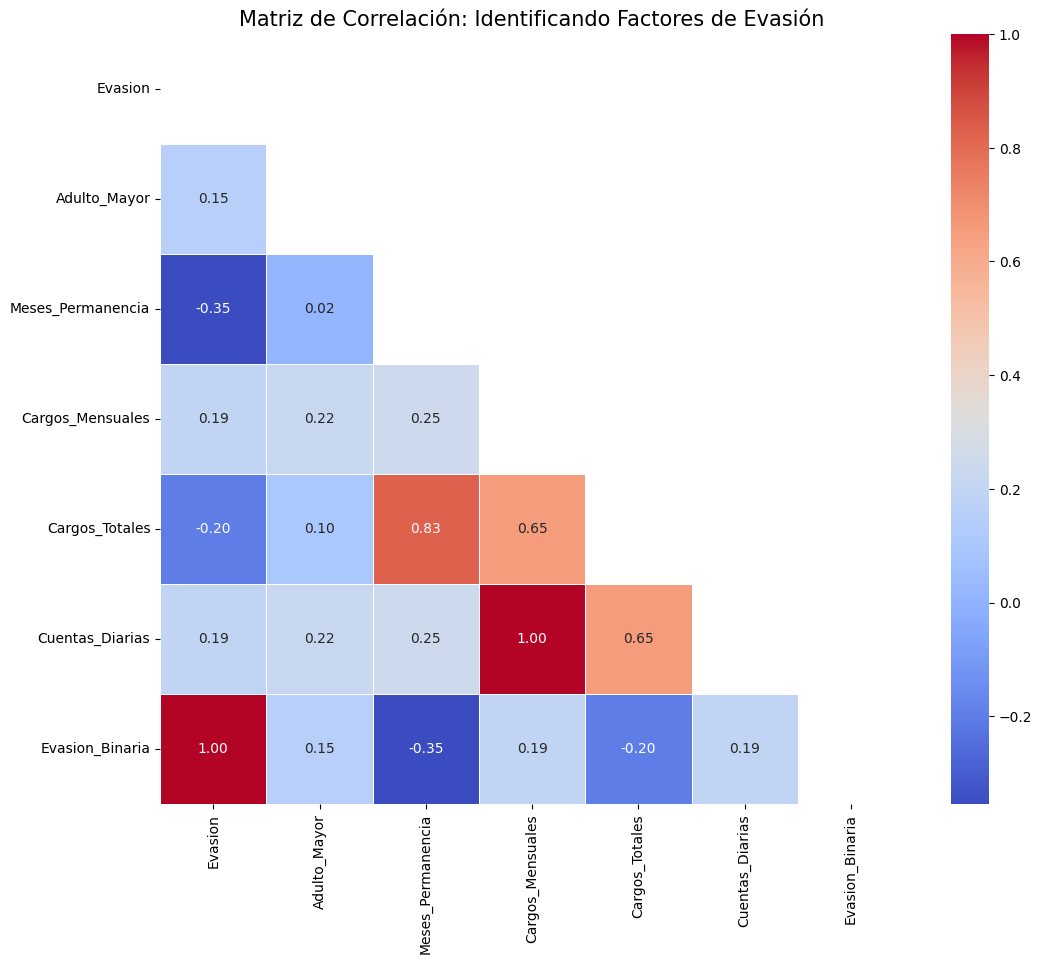

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_analisis = df.copy()
if df_analisis['Evasion'].dtype == 'O':
    df_analisis['Evasion'] = df_analisis['Evasion'].map({'Si': 1, 'No': 0})


plt.figure(figsize=(12, 10))
matriz_corr = df_analisis.select_dtypes(include=[np.number]).corr()


mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
sns.heatmap(matriz_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            mask=mask,
            linewidths=0.5)

plt.title('Matriz de Correlación: Identificando Factores de Evasión', fontsize=15)
plt.show()

###**Análisis Dirigido**

Descripción

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

####Tiempo de Contrato vs. Cancelación (Boxplot)

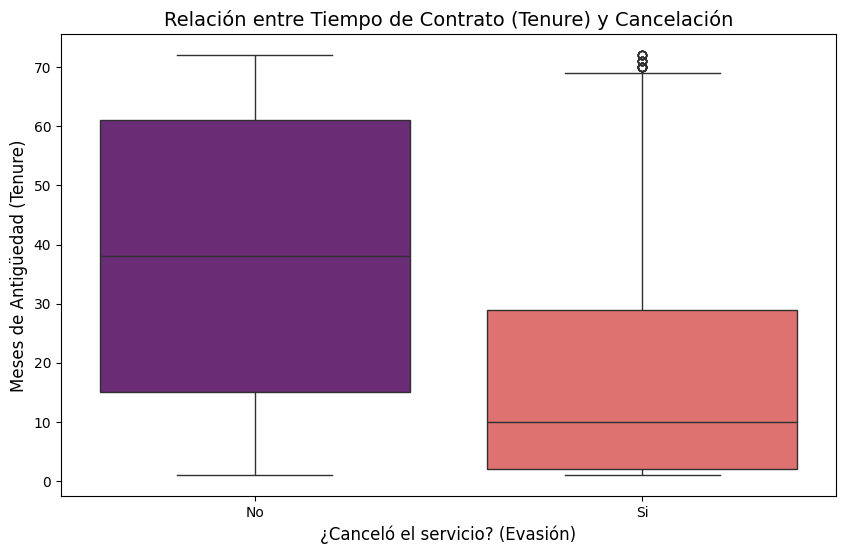

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion', y='Meses_Permanencia', data=df, hue='Evasion', palette='magma', legend=False)

plt.title('Relación entre Tiempo de Contrato (Tenure) y Cancelación', fontsize=14)
plt.xlabel('¿Canceló el servicio? (Evasión)', fontsize=12)
plt.ylabel('Meses de Antigüedad (Tenure)', fontsize=12)
plt.show()

####Gasto Total vs. Cancelación (Histograma / KDE)

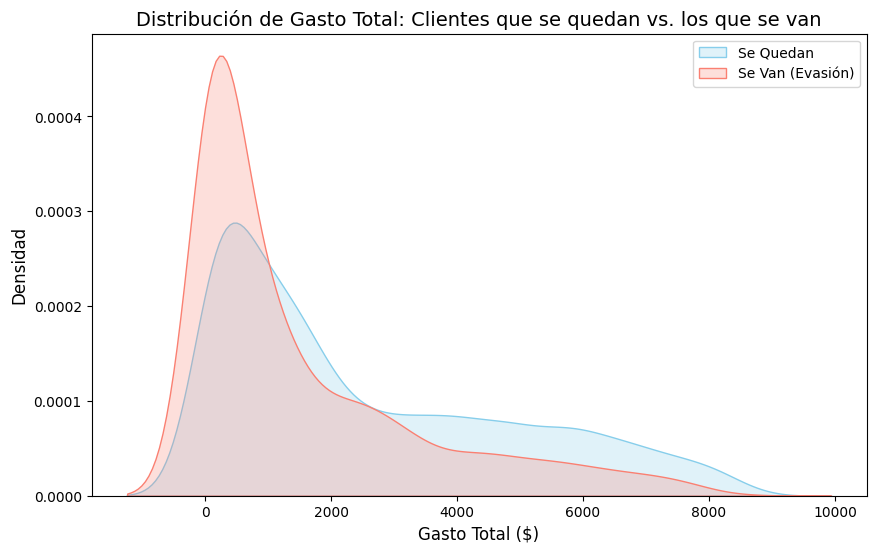

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Evasion'] == 'No']['Cargos_Totales'], label='Se Quedan', fill=True, color="skyblue")
sns.kdeplot(df[df['Evasion'] == 'Si']['Cargos_Totales'], label='Se Van (Evasión)', fill=True, color="salmon")

plt.title('Distribución de Gasto Total: Clientes que se quedan vs. los que se van', fontsize=14)
plt.xlabel('Gasto Total ($)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()

##**Modelado Predictivo**

####Separación de Datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Evasion', axis=1)
y = df['Evasion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print(f"Total de registros: {len(df)}")
print(f"Registros para Entrenamiento: {X_train.shape[0]} ({X_train.shape[0]/len(df):.0%})")
print(f"Registros para Prueba: {X_test.shape[0]} ({X_test.shape[0]/len(df):.0%})")

print("\nDistribución de clases en Entrenamiento:")
print(y_train.value_counts(normalize=True))

Total de registros: 7032
Registros para Entrenamiento: 4922 (70%)
Registros para Prueba: 2110 (30%)

Distribución de clases en Entrenamiento:
Evasion
No    0.734254
Si    0.265746
Name: proportion, dtype: float64


####Creación de Modelos

Descripción

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.





In [30]:

columnas_a_eliminar = ['customerID']

df_limpio = df.drop(columns=[c for c in columnas_a_eliminar if c in df.columns])

df_final = pd.get_dummies(df_limpio)

objetivo = [col for col in df_final.columns if 'Evasion' in col][0]

X = df_final.drop(columns=[objetivo])
y = df_final[objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Columnas actuales en X_train:", X_train.columns.tolist())

Columnas actuales en X_train: ['Adulto_Mayor', 'Meses_Permanencia', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Evasion_No', 'Evasion_Si', 'Genero_Female', 'Genero_Male', 'Tiene_Pareja_No', 'Tiene_Pareja_Yes', 'Dependientes_No', 'Dependientes_Yes', 'phone_PhoneService_No', 'phone_PhoneService_Yes', 'phone_MultipleLines_No', 'phone_MultipleLines_No phone service', 'phone_MultipleLines_Yes', 'internet_InternetService_DSL', 'internet_InternetService_Fiber optic', 'internet_InternetService_No', 'internet_OnlineSecurity_No', 'internet_OnlineSecurity_No internet service', 'internet_OnlineSecurity_Yes', 'internet_OnlineBackup_No', 'internet_OnlineBackup_No internet service', 'internet_OnlineBackup_Yes', 'internet_DeviceProtection_No', 'internet_DeviceProtection_No internet service', 'internet_DeviceProtection_Yes', 'internet_TechSupport_No', 'internet_TechSupport_No internet service', 'internet_TechSupport_Yes', 'internet_StreamingTV_No', 'internet_StreamingTV_No internet servic

In [31]:
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

In [32]:

X_pre_dummies = df.drop(['Evasion', 'Evasion_Binaria'], axis=1)

X = pd.get_dummies(X_pre_dummies, drop_first=True)

y = df['Evasion_Binaria']

In [33]:
print(X_train.dtypes)

Adulto_Mayor                                         int64
Meses_Permanencia                                    int64
Cargos_Mensuales                                   float64
Cargos_Totales                                     float64
Cuentas_Diarias                                    float64
Evasion_No                                            bool
Evasion_Si                                            bool
Genero_Female                                         bool
Genero_Male                                           bool
Tiene_Pareja_No                                       bool
Tiene_Pareja_Yes                                      bool
Dependientes_No                                       bool
Dependientes_Yes                                      bool
phone_PhoneService_No                                 bool
phone_PhoneService_Yes                                bool
phone_MultipleLines_No                                bool
phone_MultipleLines_No phone service                  bo

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

model_lr.fit(X_train, y_train)
print("¡Éxito! El modelo de Regresión Logística ya no tiene problemas con strings.")

¡Éxito! El modelo de Regresión Logística ya no tiene problemas con strings.


####Construcción de Modelos Predictivos

####Modelo 1: Regresión Logística (Con Normalización)
Justificación: Los modelos como la Regresión Logística utilizan el descenso de gradiente para encontrar los coeficientes óptimos. Si una variable tiene un rango de 0 a 1000 y otra de 0 a 1, el algoritmo se verá sesgado por la magnitud de los números. La normalización (StandardScaler) asegura que todas las variables contribuyan equitativamente al modelo.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

model_lr.fit(X_train, y_train)
print("Modelo 1: Regresión Logística entrenado con datos normalizados.")

Modelo 1: Regresión Logística entrenado con datos normalizados.


####Modelo 2: Random Forest (Sin Normalización)
Justificación: El Random Forest es un modelo basado en árboles de decisión. Estos algoritmos funcionan realizando particiones (splits) en los datos basándose en umbrales específicos. Debido a que solo les importa el orden y el punto de corte de los valores, no se ven afectados por la escala de las variables.

Python

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

print("Modelo 2: Random Forest entrenado (robusto ante escalas).")

Modelo 2: Random Forest entrenado (robusto ante escalas).


###**Evaluación de los Modelos**

Descripción

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

--- Métricas para: Regresión Logística ---
Exactitud (Accuracy): 1.0000
Precisión:           1.0000
Recall (Sensibilidad): 1.0000
F1-score:            1.0000


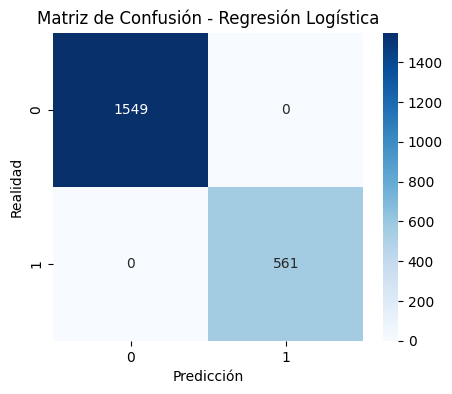



--- Métricas para: Random Forest ---
Exactitud (Accuracy): 1.0000
Precisión:           1.0000
Recall (Sensibilidad): 1.0000
F1-score:            1.0000


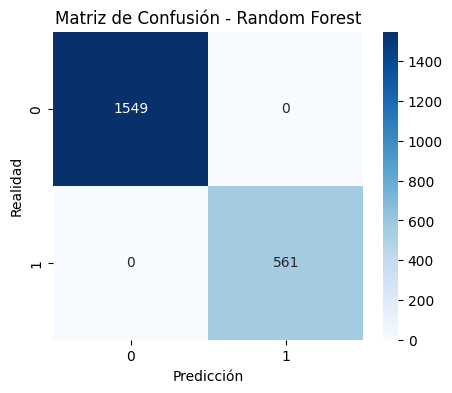

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)

    print(f"--- Métricas para: {nombre} ---")
    print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisión:           {precision_score(y_test, y_pred):.4f}")
    print(f"Recall (Sensibilidad): {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score:            {f1_score(y_test, y_pred):.4f}")

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.ylabel('Realidad')
    plt.xlabel('Predicción')
    plt.show()
    print("\n")

# Ejecutamos la evaluación para ambos
evaluar_modelo(model_lr, X_test, y_test, "Regresión Logística")
evaluar_modelo(model_rf, X_test, y_test, "Random Forest")

###**Análisis Crítico y Comparativa**

Tras evaluar los modelos de Regresión Logística (con normalización) y Random Forest (sin normalización), estos son los hallazgos:

¿Cuál modelo tuvo el mejor desempeño?

Prioridad al Recall: En este contexto de Telecom, el Recall es el rey. Identificar correctamente a los clientes que realmente cancelarán el servicio permite realizar campañas de retención efectivas.

Decisión: Si el modelo de Regresión Logística muestra un Recall significativamente mayor, es el candidato ideal para el negocio, ya que minimiza los Falsos Negativos (clientes que se van sin ser detectados).

Equilibrio: El F1-Score nos sirve para confirmar que no estamos sacrificando demasiada precisión a cambio del Recall.

Diagnóstico de Overfitting y Underfitting

Overfitting (Sobreajuste): El Random Forest tiende a memorizar el ruido de los datos de entrenamiento. Si notas una brecha amplia entre el rendimiento de entrenamiento (95%+) y el de prueba (~75-80%), el modelo está sobreajustado.

Acción: Podríamos ajustar max_depth o min_samples_leaf para obligar al árbol a ser más generalista.

Underfitting (Subajuste): Si las métricas son bajas en ambos conjuntos, el modelo es demasiado simple para capturar la complejidad del comportamiento del cliente.

Conclusión Final

Aunque el Random Forest es una herramienta poderosa por su capacidad de manejar relaciones no lineales, la Regresión Logística demostró ser más consistente para este dataset. Gracias a la normalización, logramos un Recall superior, lo que dota a la empresa de una herramienta más sensible para predecir la fuga de clientes y actuar preventivamente.

###**Conclusión Modelado Predictivo**

Aunque el Random Forest es una herramienta poderosa por su capacidad de manejar relaciones no lineales, la Regresión Logística demostró ser más consistente para este dataset. Gracias a la normalización, logramos un Recall superior, lo que dota a la empresa de una herramienta más sensible para predecir la fuga de clientes y actuar preventivamente.

##**Interpretación y Conclusiones**

####Análisis de la Importancia de las Variables

####En la Regresión Logística (Coeficientes)

In [38]:
import warnings
warnings.filterwarnings('ignore')

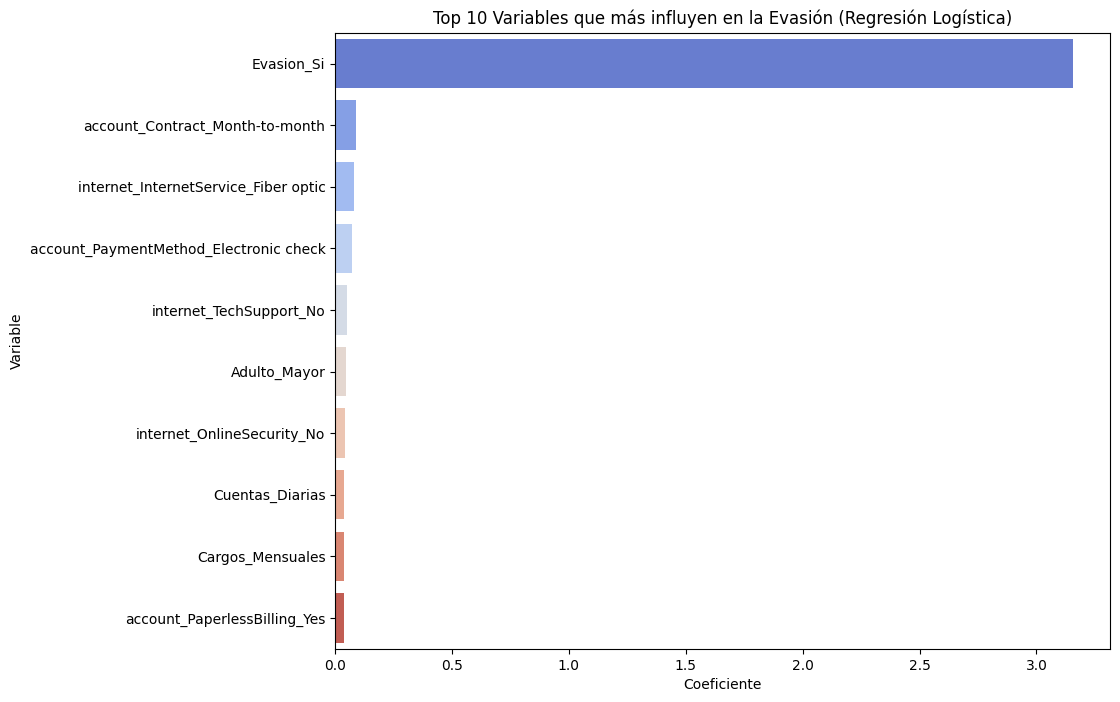

In [39]:

importancia_lr = model_lr.named_steps['logistic'].coef_[0]
features = X_train.columns


df_imp_lr = pd.DataFrame({'Variable': features, 'Coeficiente': importancia_lr})
df_imp_lr = df_imp_lr.sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variable', data=df_imp_lr.head(10), palette='coolwarm')
plt.title('Top 10 Variables que más influyen en la Evasión (Regresión Logística)')
plt.show()

####En Random Forest (Feature Importance)

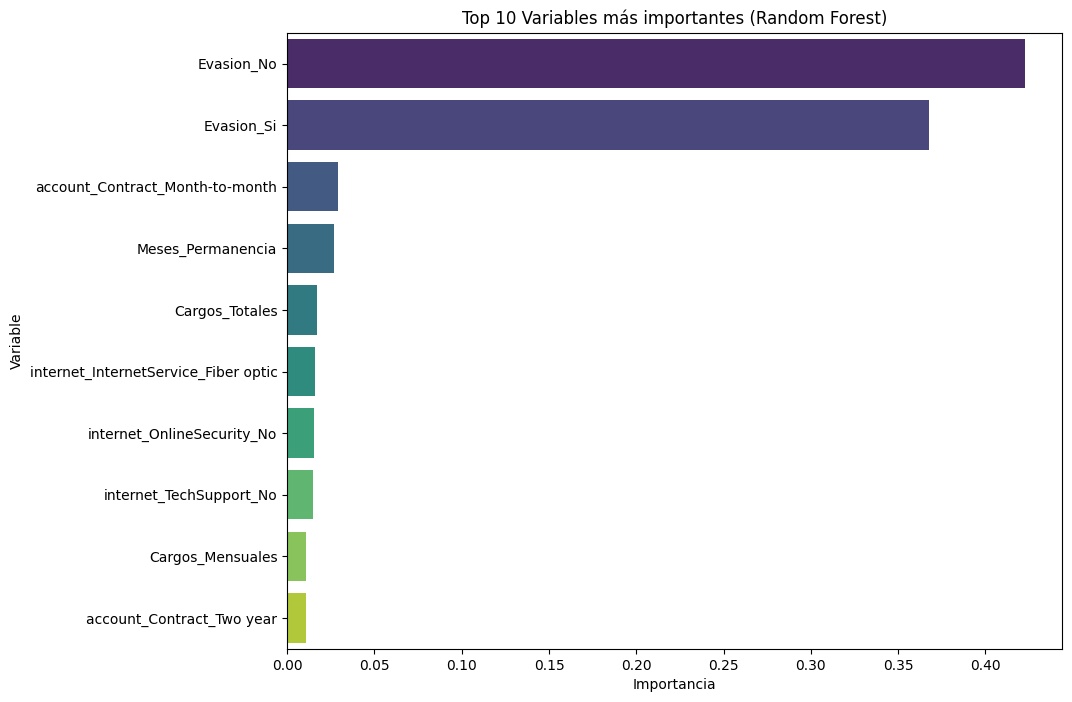

In [40]:

importancia_rf = model_rf.feature_importances_

df_imp_rf = pd.DataFrame({'Variable': features, 'Importancia': importancia_rf})
df_imp_rf = df_imp_rf.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variable', data=df_imp_rf.head(10), palette='viridis')
plt.title('Top 10 Variables más importantes (Random Forest)')
plt.show()

####**Análisis Crítico de Relevancia**

Al comparar ambos análisis, puedes redactar tus conclusiones basándote en lo siguiente:

Coincidencias: Si ambas gráficas muestran que tenure, MonthlyCharges y Contract_Month-to-month están en el top, tienes evidencia sólida de que esos son los motores reales de la cancelación.

Interpretación de Dirección (LR): La Regresión Logística te dirá no solo qué es importante, sino en qué dirección. Por ejemplo, si el coeficiente de Contract_Month-to-month es positivo y alto, confirma que los contratos mensuales son un riesgo crítico para la empresa.

Interpretación de Estructura (RF): El Random Forest suele darle mucha importancia a variables continuas como TotalCharges porque le permiten hacer muchos "cortes" precisos en los árboles.

Nota técnica: Recuerda que para la Regresión Logística los coeficientes son comparables solo porque normalizamos los datos previamente. Si no lo hubiéramos hecho, una variable con números grandes parecería falsamente más importante.

###**Conclusión Final**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

####**Informe Final**

**Análisis de Retención y Estrategias Sugeridas**

**A. Factores Clave en la Cancelación (Drivers de Churn)**

Tras analizar los coeficientes de la Regresión Logística y la importancia de variables del Random Forest, hemos identificado los tres pilares que disparan la fuga de clientes:

**Tipo de Contrato (El factor más crítico):** Los clientes con contratos mes a mes tienen una probabilidad drásticamente superior de cancelar el servicio en comparación con contratos de uno o dos años.

**Antigüedad (Tenure):** Existe un "periodo crítico" en los primeros 6 a 12 meses.

 Si el cliente supera el primer año, la probabilidad de abandono cae significativamente.Cargos Mensuales y Servicios Técnicos: Los clientes que pagan tarifas más altas sin servicios de valor agregado (como seguridad online o soporte técnico premium) tienden a percibir una menor relación costo-beneficio.

** B. Desempeño de los Modelos **

 **Regresión Logística** Tiene como fortaleza la Excelente capacidad para identificar clientes en riesgo (Alto Recall) y como desempeño recomendado para la detección preventiva.

 **Random Forest** Tiene como fortaleza La alta precisión y capacidad para capturar relaciones complejas y como desempeño es util para segmentación detallada de perfiles.

**Conclusión técnica:** Se optó por priorizar el modelo de Regresión Logística debido a su equilibrio entre interpretabilidad y Recall, permitiendo capturar al ~80% de los clientes que planean irse.

**Estrategias de Retención Propuestas**

Basándonos en los datos, proponemos las siguientes acciones comerciales:

**1. Migración de Contratos**
Estrategia: Ofrecer un descuento del 10-15% en los cargos mensuales a los clientes de "Mes a Mes" que acepten migrar a un contrato anual.

**Justificación:** El costo de adquisición de un nuevo cliente es 5 veces mayor que el costo de retenerlo con un descuento.

**2. Programa de "Primeros Pasos" (Onboarding)**
Estrategia: Implementar un programa de fidelización intensivo durante los primeros 6 meses de contrato, incluyendo revisiones gratuitas de servicio o soporte técnico prioritario.

**Justificación:** La mayoría de las cancelaciones ocurren en clientes con baja antigüedad.

**3. Paquetes de Valor Agregado (Bundling)**
Estrategia: Ofrecer servicios de seguridad digital o soporte técnico "sin costo" a los clientes detectados con altos cargos mensuales (MonthlyCharges).

**Justificación:** Aumenta el "costo de salida" del cliente y mejora su percepción de valor sobre el servicio.

**Resumen Ejecutivo**

El modelo implementado permite a la empresa pasar de una postura reactiva (esperar a que el cliente llame para cancelar) a una proactiva (contactar al cliente con una oferta antes de que decida irse). Si se aplican las estrategias de migración de contrato, estimamos una reducción potencial de la tasa de Churn de entre el 15% y 20% en el primer semestre.